In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv(r"spam_ham_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

In [6]:
from wordcloud import WordCloud

In [7]:
# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)

In [11]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [13]:
df.shape

(5171, 2)

In [14]:
df.duplicated().sum()

np.int64(178)

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(4993, 2)

In [17]:
df.rename(columns ={'label_num':'target'}, inplace = True)

In [18]:
values = df['target'].value_counts()



In [19]:
values =df['target'].value_counts()
total= values.sum()

percentage_0 = (values[0]/total)*100
percentage_1 = (values[1]/total)*100

print('percenatge of 0 :',percentage_0)
print('percentage of 1 :',percentage_1)

percenatge of 0 : 70.71900660925296
percentage of 1 : 29.280993390747046


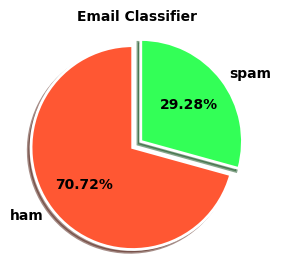

In [20]:
import matplotlib.pyplot as plt
colors = ['#FF5733','#33FF57']
explode = (0,0.1)
fig, ax = plt.subplots(figsize=(3,3))
ax.set_facecolor('white')

wedges, texts, autotexts =ax.pie(
    values, labels=['ham','spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth':2,'edgecolor': 'white'},
    explode=explode,
    shadow=True
)

for text, autotext in zip(texts, autotexts):
    text.set(size=10, weight='bold')
    autotext.set(size=10,weight='bold')

ax.set_title('Email Classifier', fontsize=10, fontweight='bold')
ax.axis('equal')
plt.show()

In [21]:
df['num_characters'] =df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,text,target,num_characters,num_words,num_sentence
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [23]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [24]:
df[df['target'] ==0] [['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [25]:
df[df['target'] ==1] [['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


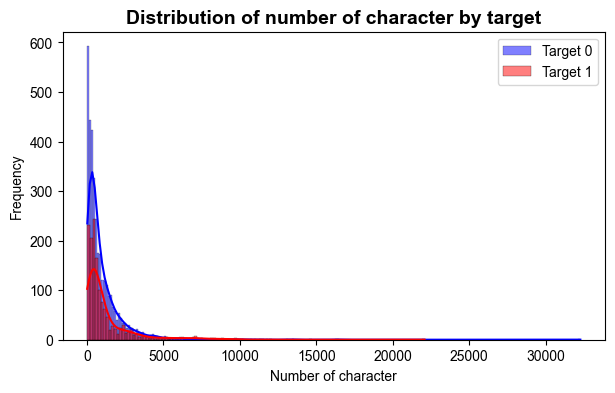

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
sns.histplot(df[df['target']==0]['num_characters'], color='blue', label='Target 0',kde=True)
sns.histplot(df[df['target']==1]['num_characters'],color='red', label='Target 1', kde=True)
plt.xlabel('Number of character',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Distribution of number of character by target', fontsize=14,fontweight='bold')
plt.legend()
sns.set(style='whitegrid')
plt.show()

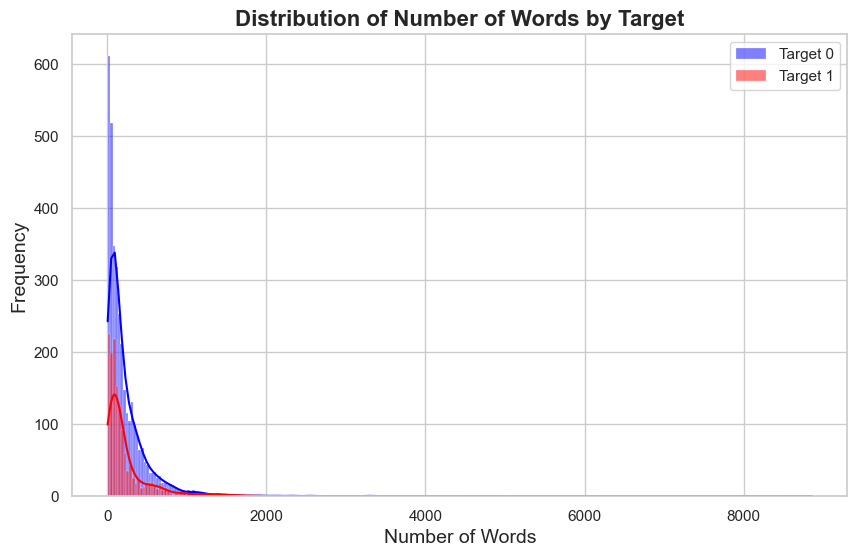

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='whitegrid') 
plt.show()

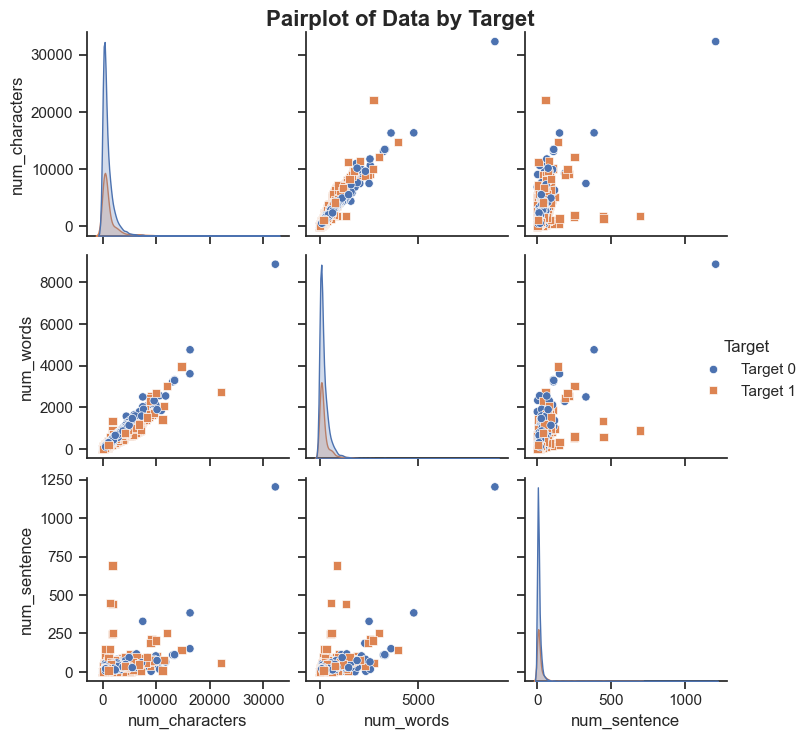

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)
plt.show()

In [29]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.074794,0.014425,0.095863
num_characters,0.074794,1.000000,0.970492,0.630026
num_words,0.014425,0.970492,1.000000,0.703256
num_sentence,0.095863,0.630026,0.703256,1.000000


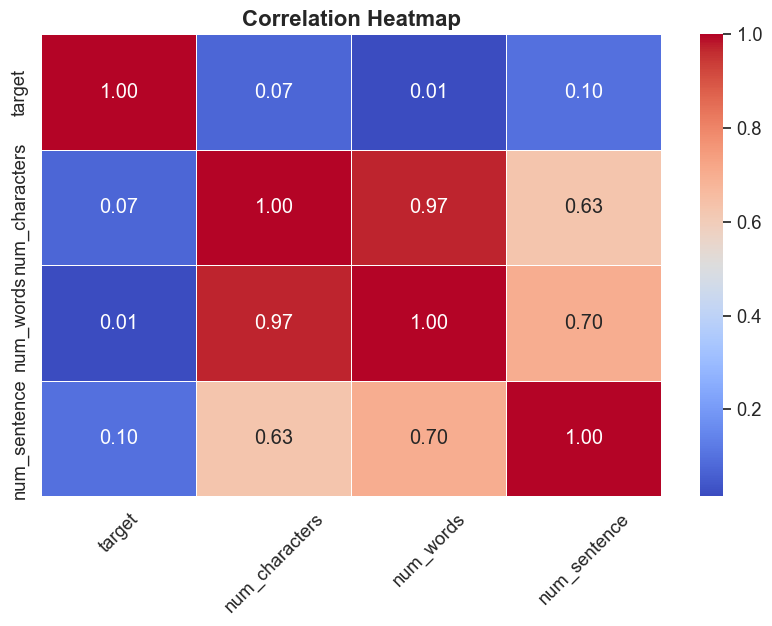

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [31]:
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()


def transform_text(text):
  
    text = text.lower()

 
    text = nltk.word_tokenize(text)


    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

  
    text = y[:]
    y.clear()

   
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

  
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [32]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [33]:
print('hi')

hi


In [34]:
print('hello')

hello


In [35]:
print(df.columns)


Index(['text', 'target', 'num_characters', 'num_words', 'num_sentence'], dtype='object')


In [36]:
print(transform_text)


<function transform_text at 0x0000022C9D0B1620>


In [37]:
def transform_text(text):
    # Example transformation logic
    return text.lower()  # Modify this based on your actual transformation logic


In [38]:
print(transform_text("Test text"))


test text


In [39]:
df['text'] = df['text'].astype(str)


In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,text,target,num_characters,num_words,num_sentence,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject: enron methanol ; meter # : 988291\r\n...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,"subject: hpl nom for january 9 , 2001\r\n( see..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,"subject: neon retreat\r\nho ho ho , we ' re ar..."
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,"subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject: re : indian springs\r\nthis deal is t...


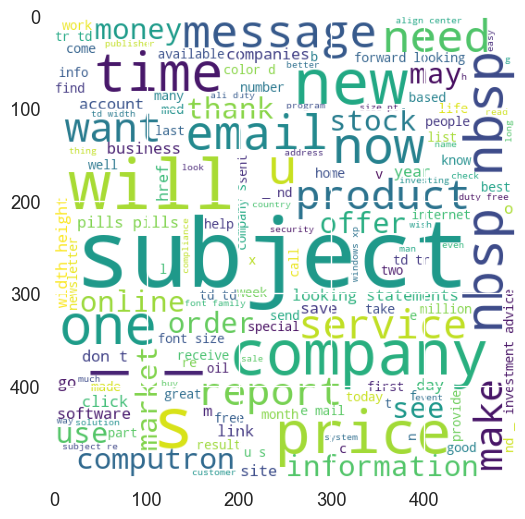

In [42]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

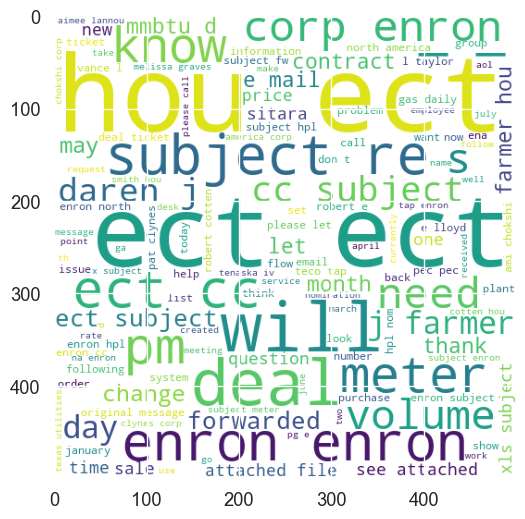

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [44]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [45]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\disha\AppData\Local\Temp\ipykernel_16308\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


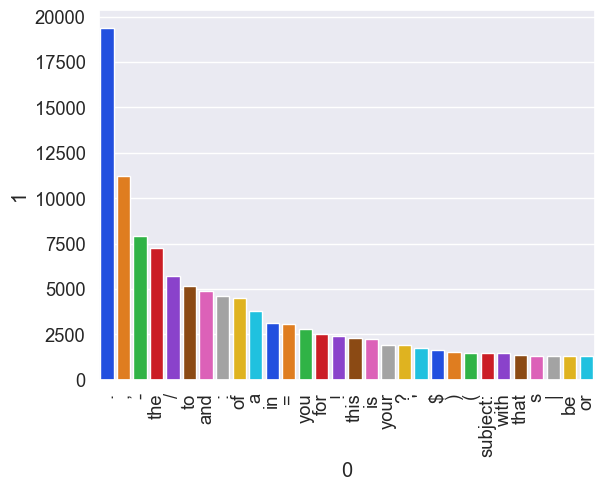

In [46]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [47]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [48]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\disha\AppData\Local\Temp\ipykernel_16308\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


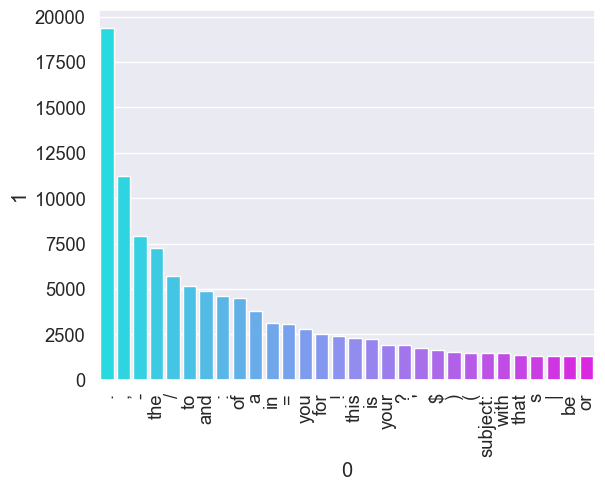

In [49]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

ModuleNotFoundError: No module named 'sklearn'

In [51]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 453.5 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.0 MB 453.5 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.0 MB 453.5 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.0 MB 453.5 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/11.0 MB 419.4 kB/s eta 0:00:25
   --- ------------------------------------ 1.0/11.0 MB 508.4 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.0 MB 508.4 kB/s eta 0:00:20
   ---- -------------------

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [54]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [57]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

For: SVC
Accuracy: 0.975975975975976
Precision: 0.9426751592356688

For: LR
Accuracy: 0.953953953953954
Precision: 0.9



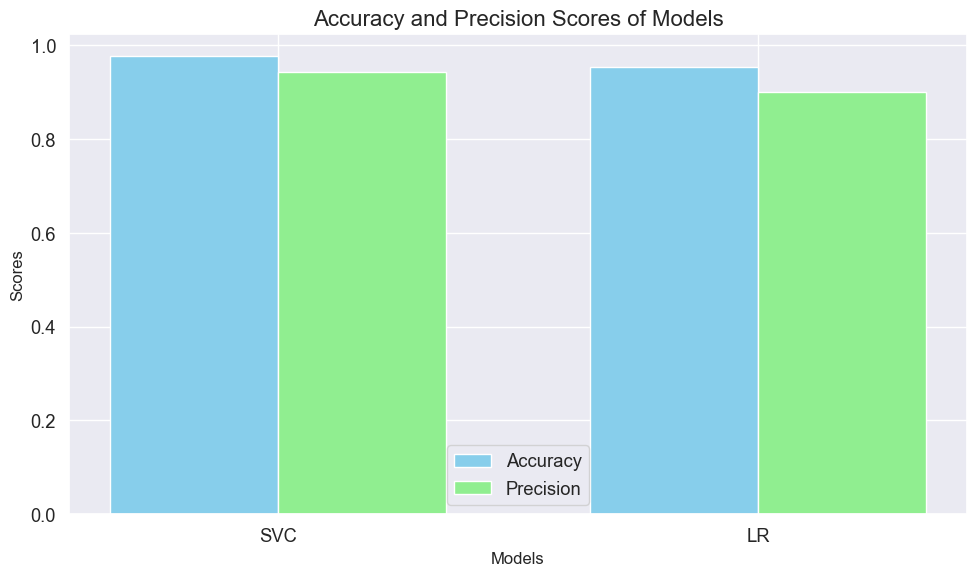

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

clfs = {
    'SVC': svc,
     'LR': lrc,
}
accuracy_scores = []
precision_scores = []

# Train each model and collect scores
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For: {name}\nAccuracy: {current_accuracy}\nPrecision: {current_precision}\n")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Plotting the results
model_names = list(clfs.keys())  # Names of the models
x = np.arange(len(model_names))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy and precision bars
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, precision_scores, width, label='Precision', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Accuracy and Precision Scores of Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()

In [60]:
def predict_spam_or_ham(text, classifier, vectorizer):
  
    text_transformed = vectorizer.transform([text]).toarray()  # Convert sparse matrix to dense array

    prediction = classifier.predict(text_transformed)

    if prediction == 1:
        return f"{text}:::Spam"
    else:
        return f"{text}:::Ham"

# Example usage:
new_text = "there is an important meeting tomorrow please be there!"
predicted_label = predict_spam_or_ham(new_text, svc, tfid)

print(predicted_label)

there is an important meeting tomorrow please be there!:::Ham


In [61]:
random_sentences = [
    "You have been selected for a free vacation! Click here to claim your prize.",
    "Meeting tomorrow at 10 AM. Don’t forget to bring the project report.",
    "Earn $5000 per week working from home. No experience needed!",
    "Let’s catch up for lunch this weekend. How about Saturday?",
    "Your account has been compromised. Please reset your password immediately.",
    "Hey, I’ll be late to the party tonight. See you there!",
    "Get a free iPhone now! Limited time offer.",
    "Please review the attached document and provide feedback."
]


for text in random_sentences:
  predicted_label = predict_spam_or_ham(text, svc, tfid)
  print(predicted_label)


You have been selected for a free vacation! Click here to claim your prize.:::Spam
Meeting tomorrow at 10 AM. Don’t forget to bring the project report.:::Ham
Earn $5000 per week working from home. No experience needed!:::Ham
Let’s catch up for lunch this weekend. How about Saturday?:::Ham
Your account has been compromised. Please reset your password immediately.:::Spam
Hey, I’ll be late to the party tonight. See you there!:::Ham
Get a free iPhone now! Limited time offer.:::Spam
Please review the attached document and provide feedback.:::Ham
